# Problem Set 2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm 
import itertools
from iminuit import Minuit   
from scipy.optimize import minimize
import sys  
from importlib import reload
from scipy import interpolate

#!pip install shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# external libraries
sys.path.append('../') 
import AdvAppStatFunctions as aas

# setting for plotting
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
sns.set_palette("colorblind")
color = sns.color_palette("colorblind")

In [4]:
save_fig = False

## Exercise 0

**Plot of a 
gaussian probability distribution function centered at μ=10 
and with $\sigma^2=2.3$**

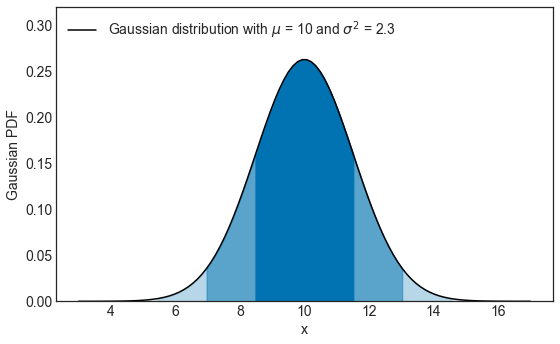

In [5]:
xrange = np.linspace(3,17, 100)
mu, sigma = 10, np.sqrt(2.3)

ygauss = aas.gaussian_unit(xrange, mu, sigma)

fig = plt.figure(figsize=(8,5))
plt.plot(xrange, ygauss, label = r'Gaussian distribution with $\mu$ = %s and $\sigma^2$ = %s' %(mu, round(sigma**2,2)), color='black')
plt.legend(loc='upper left')
plt.ylim(0, 0.32)
plt.fill_between(np.linspace(mu-sigma, mu+sigma), aas.gaussian_unit(np.linspace(mu-sigma, mu+sigma), mu, sigma), color = color[0])
plt.fill_between(np.linspace(mu-2*sigma, mu+2*sigma), aas.gaussian_unit(np.linspace(mu-2*sigma, mu+2*sigma), mu, sigma), color = color[0], alpha = 0.5)
plt.fill_between(np.linspace(mu-3*sigma, mu+3*sigma), aas.gaussian_unit(np.linspace(mu-3*sigma, mu+3*sigma), mu, sigma), color = color[0], alpha = 0.2)
plt.fill_between(xrange, ygauss, alpha = 0.1, color=color[0])
plt.ylabel('Gaussian PDF')
plt.xlabel('x')
fig.tight_layout()

if save_fig:
    fig.savefig('Exercise0');

## Problem 1 - PDF alpha and beta

### Defining likelihoods

In [41]:
def likelihood_pdf(x, alpha, beta):
    # transform function into pdf (normalize!) and include limits for x (-1.02..1.11)
    func = 1 + alpha*x + beta*x**2 
    func_int = 0.09585*alpha + 0.809613*beta + 2.13
    pdf = func / func_int
    pdf = np.where((x >= -1.02) & (x <= 1.11), pdf, 0.) 
    return pdf

def loglikelihood_pdf(x, alpha, beta):
    return np.sum(np.log(likelihood_pdf(x, alpha, beta)), axis = 1)

### Generating MC samples

In [42]:
xrange = np.linspace(-1.02, 1.11, 100)
alpha, beta = 0.9, 0.55
n_samples = 807

x_accept, x_reject, pdf_accept, pdf_reject, pdf_curve, eff = aas.gen_MC(xrange, likelihood_pdf, [alpha, beta], n_samples)

In [43]:
data = np.array([x_accept, pdf_accept]).T
np.savetxt('wilson_polynomial.txt', data)

### Fitting MC samples

In [44]:
par[1]

0.5285138971913941

In [45]:
par, par_err, likelihood_pdf = aas.llh_fit(x_accept, likelihood_pdf, [alpha, beta], ['alpha', 'beta'], [(0,2), (0,1)])
print('Estimators using Minuit \nAlpha = %s pm %s \nBeta = %s pm %s' 
      %(round(par[0],2), round(par_err[0], 2), round(par[1], 2), round(par_err[1], 2)))

pdf_fit = likelihood_pdf(xrange, par[0], par[1])

Estimators using Minuit 
Alpha = 1.0 pm 0.09 
Beta = 0.57 pm 0.15


TypeError: 'float' object is not callable

### Plotting result

NameError: name 'pdf_fit' is not defined

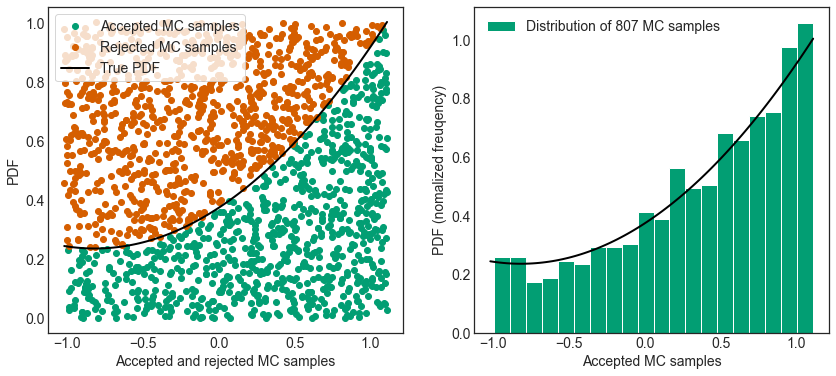

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(x_accept, pdf_accept, 'o', color = color[2], label = 'Accepted MC samples')
ax1.plot(x_reject, pdf_reject, 'o', color = color[3], label = 'Rejected MC samples')
ax1.plot(xrange, pdf_curve, color = 'black', lw=2, label = 'True PDF')
ax1.legend(loc = 'upper left', frameon = True)
ax1.set_xlabel('Accepted and rejected MC samples')
ax1.set_ylabel('PDF')

#ax2.hist(x_accept, bins = 20, density = True, color=color[2], label = 'MC samples') 
aas.plot_hist(x_accept, min(x_accept), max(x_accept), 20, ax2, xlabel='Accepted MC samples', 
              histlabel='Distribution of 807 MC samples', d_xy = [0.04, 0.70], color=color[2])
ax2.plot(xrange, pdf_curve, ls = '-', color = 'black', lw = 2, label = r'True PDF')
ax2.plot(xrange, pdf_fit, ls = '-', color = color[3], lw = 3, label = r'Fit')
ax2.legend()
ax2.text(-1, 0.78, r'PDF $\propto 1 + \alpha x + \beta x^2$')  
ax2.text(-1.0, 0.7, r'$\alpha_{fit}$ = %s $\pm$ %s' %(round(par[0],3), round(par_err[0],3)))
ax2.text(-1.0, 0.62, r'$\beta_{fit}$ = %s $\pm$ %s ' %(round(par[1],3), round(par_err[1],3)))
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()

print('Efficiency =', round(eff,3))

if save_fig:
    fig.savefig('Exercise1');

### Find the maximum likelihood estimator (MLE) ‘best-fit’ for alpha and beta

**Using the BOOTSTRAPPING METHOD**

In [47]:
# define xrange, parameters and number of samples
n_trials = 500

alpha_fit, beta_fit = [], []

# run MC and fit MC samples
for i in range(n_trials):
    x_accept, x_reject, pdf_accept, pdf_reject, pdf_curve, eff = aas.gen_MC(xrange, likelihood_pdf, [alpha, beta], n_samples)
    par, par_err, negLLH_val = aas.llh_fit(x_accept, likelihood_pdf, [alpha, beta], ['alpha', 'beta'], [(0,2), (0,1)])
    alpha_fit = np.append(alpha_fit, par[0])
    beta_fit = np.append(beta_fit, par[1])

TypeError: 'float' object is not callable

In [12]:
alpha_mean, alpha_rmse = np.mean(alpha_fit), np.std(alpha_fit)
beta_mean, beta_rmse = np.mean(beta_fit), np.std(beta_fit)

print('Estimators \nAlpha mean =', round(alpha_mean, 4), '\nAlpha RMSE =', round(alpha_rmse, 4),
      '\n\nBeta mean =', round(beta_mean, 4), '\nBeta RMSE =', round(beta_rmse, 4))

alpha_cl = aas.confidence_level(alpha_fit)
beta_cl = aas.confidence_level(beta_fit)

print('Alpha =', round(alpha_cl[0], 3), '-', round(alpha_cl[1], 3), '+', round(alpha_cl[2], 3))
print('Beta =', round(beta_cl[0], 3), '-', round(beta_cl[1], 3), '+', round(beta_cl[2], 3))

Estimators 
Alpha mean = nan 
Alpha RMSE = nan 

Beta mean = nan 
Beta RMSE = nan


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: list index out of range

ValueError: min() arg is an empty sequence

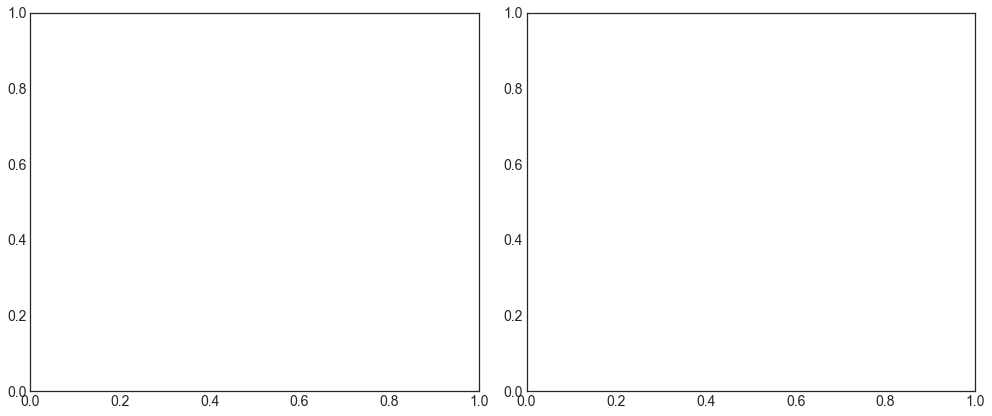

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6), tight_layout=True)
aas.plot_hist(alpha_fit, min(alpha_fit), max(alpha_fit), 22, ax1, xlabel=r'$\alpha$', histlabel=r'Distribution of $\alpha$', 
             d_xy = [0.7, 0.8], color = color[4])

ax1.text(0.65, 4.9, r'Entries = %s' %(n_trials))
ax1.text(0.65, 4.6, r'Mean = %s' %(round(alpha_mean, 3))) 
ax1.text(0.65, 4.3, r'RMSE = %s' %(round(alpha_rmse, 3))) 

ax1.text(0.65, 3.8, r'Median = %s' %(round(np.median(alpha_fit), 3))) 
ax1.text(0.65, 3.53, r'$\sigma_{-}$ = %s' %(round(alpha_cl[1], 3))) 
ax1.text(0.65, 3.2, r'$\sigma_{+}$ = %s' %(round(alpha_cl[2], 3))) 

aas.plot_hist(beta_fit, min(beta_fit), max(beta_fit), 22, ax2, xlabel=r'$\beta$', histlabel=r'Distribution of $\beta$', 
             d_xy = [0.7, 0.8], color = color[9])

ax2.text(0.15, 2.5, r'Entries = %s' %(n_trials))
ax2.text(0.15, 2.35, r'Mean = %s' %(round(beta_mean, 3))) 
ax2.text(0.15, 2.2, r'RMSE = 0.150')#%(round(beta_rmse, 3))) 

ax2.text(0.15, 1.9, r'Median = %s' %(round(np.median(beta_fit), 3))) 
ax2.text(0.15, 1.75, r'$\sigma_{-}$ = %s' %(round(beta_cl[1], 3))) 
ax2.text(0.15, 1.6, r'$\sigma_{+}$ = %s' %(round(beta_cl[2], 3))); 

if save_fig:
    fig.savefig('Exercise1_2');

## Problem 1 - PMF Poisson

### Defining likelihoods

The easiest way would just be to use the inverse CDF of your Poisson with mean = 𝜆
 then put this [0,1] through the CDF for a Poisson 𝜆
 = 1.

In [14]:
def likelihood_pmf(x, lamb):
    func = scipy.stats.poisson.pmf(x, lamb)
    return func

def loglikelihood_pmf(x, alpha, beta):
    return np.sum(np.log(likelihood_pmf(x, alpha, beta)), axis = 1)

### Generating MC samples

In [15]:
lamb = 3.8
n_samples = 513
xrange = np.arange(0, 15)

# for plotting
xaxis = np.linspace(-0.51, 15, 1000)
yaxis = aas.poisson_pmf(np.floor(xaxis + 0.5), lamb)

x_accept, x_reject, pdf_accept, pdf_reject, pdf_curve, eff = aas.gen_MC(xrange, likelihood_pmf, [lamb], n_samples, pmf=True)

In [16]:
data = np.array([x_accept, pdf_accept]).T
#np.savetxt('wilson_poisson.txt', data)

In [17]:
y = likelihood_pmf(xrange, lamb)
print(sum(y))

y = likelihood_pmf(np.arange(0, 1000), lamb)
print(sum(y))

0.9999888980804607
0.9999999999999993


### Fitting MC samples

In [18]:
par, par_err, negLLH_val = aas.llh_fit(x_accept, likelihood_pmf, [lamb], ['Lambda'], [(1,5)])
print('Estimators using Minuit \nLambda = %s pm %s' %(round(par[0],2), round(par_err[0], 2)))

pmf_fit = aas.poisson_pmf(np.floor(xaxis+0.5), par[0])

ValueError: too many values to unpack (expected 2)

### Plotting result

In [19]:
reload(aas);

NameError: name 'pmf_fit' is not defined

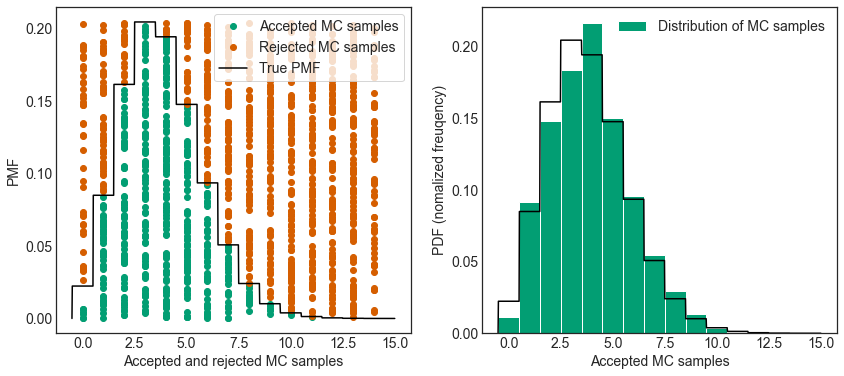

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(x_accept, pdf_accept, 'o', color = color[2], label = 'Accepted MC samples')
ax1.plot(x_reject, pdf_reject, 'o', color = color[3], label = 'Rejected MC samples')
ax1.plot(xaxis, yaxis, '-', color='black', label = 'True PMF')
ax1.legend(loc = 'upper right', frameon = True)
ax1.set_xlabel('Accepted and rejected MC samples')
ax1.set_ylabel('PMF')

#ax2.hist(x_accept, bins = 20, density = True, color=color[2], label = 'MC samples') 
aas.plot_hist(x_accept, min(x_accept), max(x_accept), np.arange(min(x_accept)-1/2, max(x_accept)+1/2), ax2, 
              xlabel='Accepted MC samples', histlabel='Distribution of MC samples', d_xy = [0.6, 0.8], color=color[2])
ax2.plot(xaxis, yaxis, '-', color='black', label = 'True PMF')
ax2.plot(xaxis, pmf_fit, ls = '-', color = color[3], lw = 2, label = r'Fit')
ax2.text(9, 0.15, r'PMF $= \frac{\lambda^x e^{- \lambda}}{x!}$')  
ax2.text(9, 0.133, r'$\lambda_{fit}$ = %s $\pm$ %s' %(round(par[0],3), round(par_err[0],3)))
ax2.legend()
fig.subplots_adjust(wspace=0.1)
fig.tight_layout()

print('Efficiency =', round(eff,3))

if save_fig:
    fig.savefig('Exercise1_3');

## Exercise 2

### Data

In [21]:
data = np.genfromtxt('OutlineAreaSpline.txt', delimiter = ' ', skip_header=1)
x, y = data[:,0], data[:,1]

### Monte Carlo function

In [22]:
def MC_batman2(n_samples, rtol=0.0015):
    n_accept = 0
    n_reject = 0
    x_accept, x_reject, y_accept, y_reject = [], [], [], []
    xmin, xmax, ymin, ymax = min(x_spline), max(x_spline), min(y_spline), max(y_spline)
    
    while n_accept < n_samples:
        x_rnd, y_rnd = np.random.uniform(xmin, 0.999), np.random.uniform(ymin, ymax)
        idxs = np.where(np.isclose(x_spline, x_rnd, rtol) == True)[0]
        
        #x_rnd = np.random.choice(x_spline)
        #idxs = np.where(np.isclose(x_spline, x_rnd, 0.0014)) 

        if len(idxs) != 2 or abs(idxs[0]-idxs[1]) < 10:
            continue

        idx1, idx2 = min(idxs), max(idxs)

        
        if y_spline[idx1] <= y_rnd <= y_spline[idx2]:
            x_accept = np.append(x_accept, x_rnd)
            y_accept = np.append(y_accept, y_rnd)
            n_accept += 1

        else:
            x_reject = np.append(x_reject, x_rnd)
            y_reject = np.append(y_reject, y_rnd)        
            n_reject += 1

    eff = n_samples/(n_samples+n_reject)
    
    return x_accept, x_reject, y_accept, y_reject, eff


In [25]:
x_accept, x_reject, y_accept, y_reject, eff = MC_batman2(5000)
x_accept2, x_reject2, y_accept2, y_reject2, eff2 = MC_batman2(5000, 0.0022)

### Spline functions

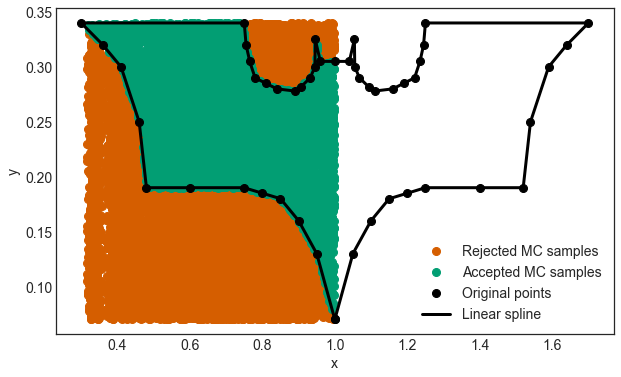

In [26]:
# Define some points:
points = data 
              

# Linear length along the line:
distance = np.cumsum(np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]

# Interpolation for different methods:
alpha = np.linspace(0, 1, 1000)

interpolated_points = {}
interpolator =  interpolate.interp1d(distance, points, kind='slinear', axis=0)
interpolated_points['slinear'] = interpolator(alpha)

x_spline = interpolator(alpha).T[0]
y_spline = interpolator(alpha).T[1]

# Graph:
fig = plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')

markersize = 8
plt.plot(x_reject2, y_reject2, 'o', color=color[3], markersize=markersize)
plt.plot(x_reject, y_reject, 'o', color=color[3], label = 'Rejected MC samples', markersize=markersize)
plt.plot(x_accept, y_accept, 'o', color=color[2], label = 'Accepted MC samples', markersize=markersize)
plt.plot(x_accept2, y_accept2, 'o', color=color[2], markersize=markersize)


plt.plot(*points.T, 'ok', label='Original points', markersize=markersize);
plt.plot(x_spline, y_spline, '-', lw=3, label = 'Linear spline', color='black')

plt.legend(loc='lower right')


if save_fig:
    fig.savefig('Exercise2');

### Area

In [1152]:
eff2

0.4449190247374978

In [1151]:
box_area = (max(x_spline)-min(x_spline))*(max(y_spline)-min(y_spline))
batman_area = eff2 * box_area 
batman_area

0.1679568662376983

In [30]:
from numpy import random
df = np.genfromtxt('OutlineAreaSpline.txt', delimiter = ' ', skip_header=1)
xbat = df[:,0]
ybat = df[:,1]
shape = Polygon(df)

x_acc = []
y_acc = []
x_rej = []
y_rej = []

while len(x_acc) < 10000:
    x_rnd, y_rnd = random.uniform(min(xbat), max(xbat)), random.uniform(min(ybat), max(ybat))
    p = Point(x_rnd, y_rnd)
    if p.within(shape):
        x_acc.append(x_rnd)
        y_acc.append(y_rnd)
    else:
        x_rej.append(x_rnd)
        y_rej.append(y_rnd)

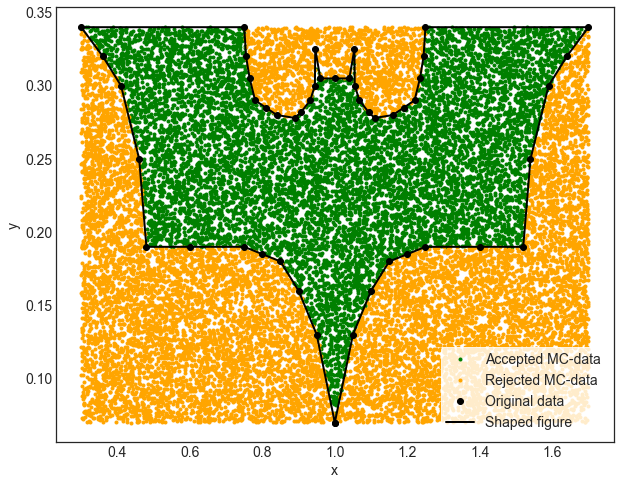

In [31]:
fig, ax = plt.subplots(figsize = (10,8))

ax.set(xlabel = 'x', ylabel = 'y')


ax.plot(x_acc,y_acc, '.', color = 'g', label = 'Accepted MC-data');
ax.plot(x_rej,y_rej, '.', color = 'orange', label = 'Rejected MC-data');
ax.plot(xbat, ybat,'o', color = 'k',label = 'Original data');
ax.plot(xbat, ybat,'-', color = 'k', linewidth=2, label = 'Shaped figure');

# to get white background of the legend
legend = plt.legend(frameon = 1, loc= 'lower right')
frame = legend.get_frame()
frame.set_color('white')
#ax.legend();


In [32]:
efficiency = len(x_acc)/( len(x_rej) + len(x_acc) )
print(f'Efficienc: {efficiency}')

full_box = ( abs(max(xbat) - min(xbat)) * abs(max(ybat)-min(ybat)) ) 
print(f'Area of box: {full_box}')

area_batman = efficiency * full_box 
print(f'Area of batman: {area_batman}')

Efficienc: 0.4302000430200043
Area of box: 0.378
Area of batman: 0.16261561626156162


# Exercise 3

Suppose that there are genes which are individually ‘x' or 
‘X’, and in combination determine some trait, e.g. hair 
color: xx is red, mixed genes (xX or Xx) are black, and XX is 
black. The population has a proportion of red-haired 
people equal to $p^2$ and mixed gene people equal to   
2p(1-p), for 0<p<1. Each parent gives a single gene to 
their offspring, with a 50:50 probability of x or X for mixed 
gene parents. We can assume a random mixture of parents 
within the population.

## Exercise 3a

Of children that are xX what is the proportion that come 
come from parents which both have black hair? 

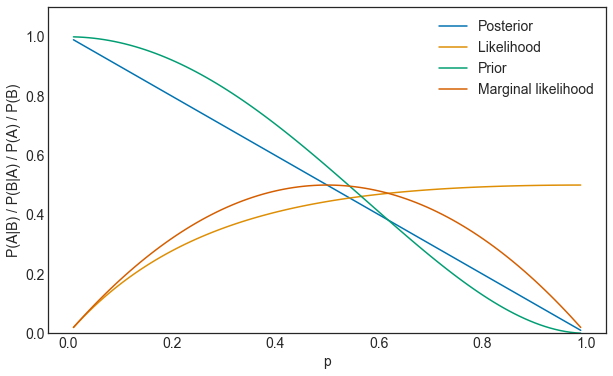

In [1156]:
p = np.linspace(0.01,0.99,100)

p_red = p**2
p_mixed = 2*p*(1-p)
p_big = (1-p)**2
p_black = 1-p_red

P_BA = 1/2*(p_mixed/p_black)**2 + 2*1/2*(p_mixed/p_black)*(p_big/p_black)
P_A = p_black**2
P_B = p_mixed

P_AB = P_BA*P_A/P_B

fig = plt.figure(figsize=(10,6))
#plt.plot((1-p**2), P_BA, color='red')
plt.plot(p, P_AB, label='Posterior')
plt.plot(p, P_BA, label='Likelihood')
plt.plot(p, P_A,  label='Prior')
plt.plot(p, P_B,  label='Marginal likelihood')
#plt.plot(p, p_big/p_black, color='green')
#plt.plot(p, p_red+p_mixed+p_big)
#plt.plot(p, P_AB, ls='dotted')
#plt.plot(p, p_big+p_mixed, ls='dotted')
plt.ylim(0,1.1)
plt.xlabel('p')
plt.ylabel('P(A|B) / P(B|A) / P(A) / P(B)')
plt.legend()

if save_fig:
    fig.savefig('Exercise3_1');

### Exercise 3b

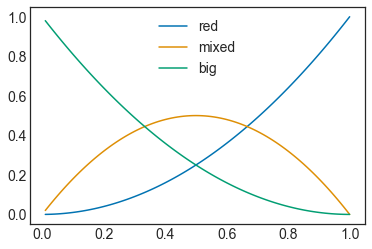

In [1165]:
plt.plot(p, p_red, label='red')
plt.plot(p, p_mixed, label='mixed')
plt.plot(p, p_big, label='big')
plt.legend()

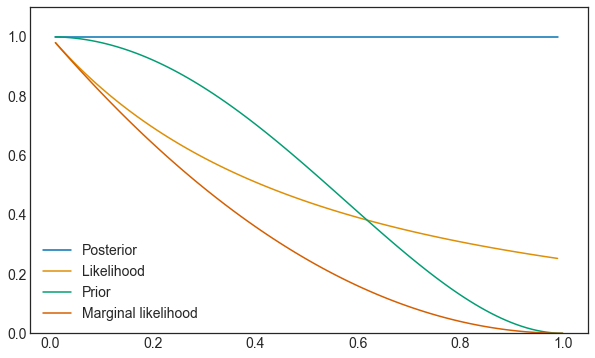

In [1157]:
p = np.linspace(0.01,1,100)

p_red = p**2
p_mixed = 2*p*(1-p)
p_big = (1-p)**2
p_black = 1-p_red

P_BA3 = 1/4*(p_mixed/p_black)**2 + 2*1/2*(p_mixed/p_black)*(p_big/p_black) + 1*(p_big/p_black)**2
P_A3 = p_black**2
P_B3 = p_big

P_AB3 = P_BA3*P_A3/P_B3

plt.figure(figsize=(10,6))
#plt.plot((1-p**2), P_BA, color='red')
plt.plot(p, P_AB3, label='Posterior')
plt.plot(p, P_BA3, label='Likelihood')
plt.plot(p, P_A3,  label='Prior')
plt.plot(p, P_B3,  label='Marginal likelihood')
#plt.plot(p, p_big/p_black, color='green')
#plt.plot(p, p_red+p_mixed+p_big)
#plt.plot(p, P_AB, ls='dotted')
#plt.plot(p, p_big+p_mixed, ls='dotted')
plt.ylim(0,1.1)
plt.legend();

In [1117]:
import warnings
warnings.filterwarnings("ignore")

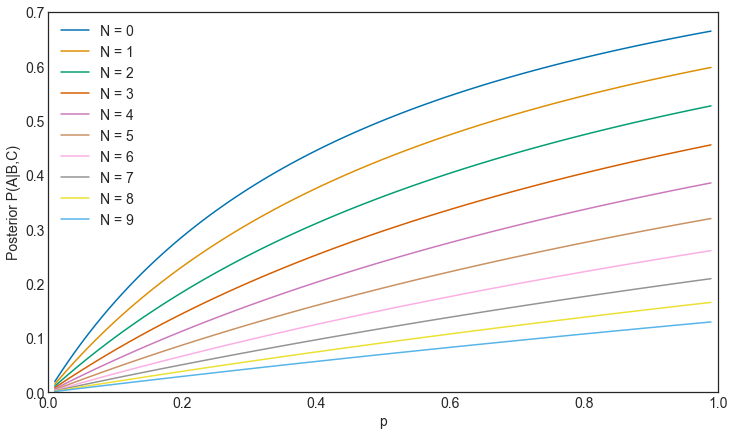

In [1163]:
N_array = np.arange(0, 10)

fig = plt.figure(figsize=(12,7))
for N in N_array:
    P = (1-p)*(3/4)**N*2*p*(1-p) / ((1-p)*(3/4)**N*2*p*(1-p)+1*1*(1-p)**2)
    
    P = (1-p)*(3/4)**N*2*p*(1-p)/(1-p**2) / ((1-p)*(3/4)**N*2*p*(1-p)/(1-p**2) + 1*1*(1-p)**2/(1-p**2))
    
    plt.plot(p, P, label=f'N = {N}')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,0.7)
plt.xlabel('p')
plt.ylabel('Posterior P(A|B,C)')

if save_fig:
    fig.savefig('Exercise3_2');

## Exercise 4

In an earlier lecture we used a prior for the total number of fish 
in a lake that was based on the ratio (and related uncertainties) 
of the volume of a lake and the volume that fish singly 
occupied. The combined uncertainty, and the mean for the 
prior, do not follow canonical error propagation or simple 
estimates. Find the mean for the total fish population and the 
range of fish population which covers the interquartile range. 

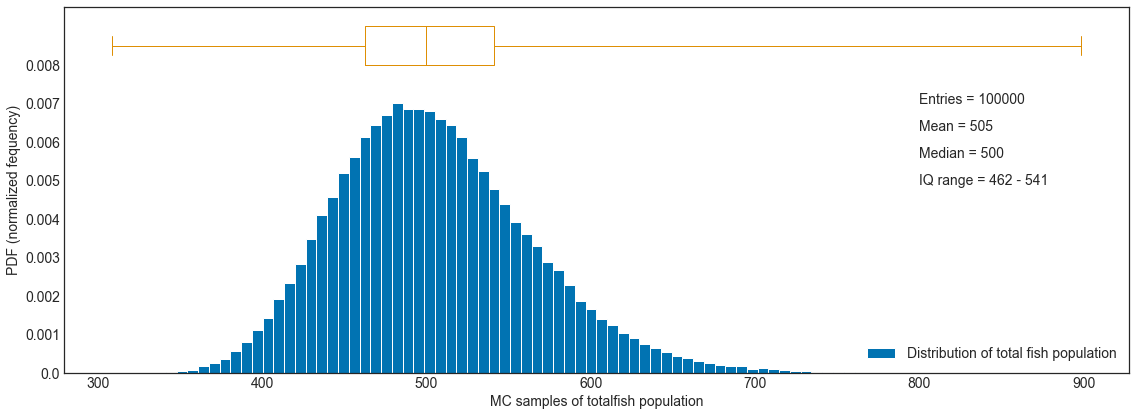

In [804]:
v_tot, sig_tot, v_fish, sig_fish = 5000, 300, 10, 1

N_total = 100000
N_bins = 90

v_tot_gen = np.random.normal(v_tot, sig_tot, N_total)
v_fish_gen = np.random.normal(v_fish, sig_fish, N_total)
N_gen = v_tot_gen / v_fish_gen
N_gen_sort = sorted(N_gen)
    
Nmin, Nmax = min(N_gen), max(N_gen)
c = color[1]
    
fig, ax = plt.subplots(figsize=(16,6))
aas.plot_hist(N_gen, Nmin, Nmax, N_bins, ax, xlabel='MC samples of totalfish population', histlabel='Distribution of total fish population', color=color[0])
#ax.vlines(np.median(N_gen), 0, 0.0075, lw=4, color=color[1], label='Median')
#ax.vlines(N_gen_sort[int(0.25*N_total)], 0, 0.0075, lw=4, color=color[3], label='Interquartile range')
#ax.vlines(N_gen_sort[int(0.75*N_total)], 0, 0.0075, lw=4, color=color[3])
ax.boxplot(N_gen, vert=False, whis=10, positions=[0.0085], widths=0.001, 
           boxprops=dict(color=c),
           capprops=dict(color=c),
           whiskerprops=dict(color=c),
           flierprops=dict(color=c, markeredgecolor=c),
           medianprops=dict(color=c))
ax.set_ylim(0, 0.0095)
ax.set_yticks(np.linspace(0,0.008, 9))
ax.set_yticklabels(np.linspace(0,0.008, 9))
ax.text(800, 0.0070, r'Entries = %s' %(len(N_gen)))
ax.text(800, 0.0063, r'Mean = %s' %(round(np.mean(N_gen))))
ax.text(800, 0.0056, r'Median = %s' %(round(np.median(N_gen))))
ax.text(800, 0.0049, r'IQ range = %s - %s' %(round(N_gen_sort[int(0.25*N_total)]), round(N_gen_sort[int(0.75*N_total)])))
ax.legend()
fig.tight_layout()

if save_fig:
    fig.savefig('Exercise4');